https://github.com/ogrisel/sklearn_pycon2014/blob/master/notebooks/01_basics.ipynb
01_basics.ipynb

# Numpy

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# Shift, Tab ~ 

In [14]:
np.random.random()

0.7510533123831513

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# np.random.random((n_row,n_col)) ~ Generates A Random Array With n_rows And n_columns

arr = np.random.random((15,15)) # 5 x 5 array
# # print (arr)
# plt.hist(arr.flatten()) # Uniform Distrubution 
# plt.show()

# arr = np.random.randn(50)
# plt.hist(arr.flatten()) # Uniform Distrubution 
# plt.show()



In [16]:
# Accessing elements in the array

print (arr[0,0]) # prints single element in the array
print (arr[0,:]) # prints first row in the array
print (arr[-1,:]) # prints last row in the array

print (arr[:,0]) # prints the first column in the array
print (arr[:,-1]) # prints the last column in the array


0.142871407038
[ 0.14287141  0.73488251  0.54339587  0.40256378  0.18937417  0.66468937
  0.09871221  0.35299888  0.53682491  0.70708102  0.49553979  0.3990725
  0.61892629  0.12317222  0.48811495]
[ 0.53920703  0.96235659  0.13210349  0.47947365  0.61676969  0.46431891
  0.82110411  0.19814132  0.75038486  0.61638498  0.65567019  0.63201516
  0.01710933  0.24523077  0.90175658]
[ 0.14287141  0.40228448  0.95761958  0.62351562  0.42353085  0.1905494
  0.05715983  0.86737042  0.95480459  0.58466752  0.37813084  0.3662814
  0.8543816   0.05748577  0.53920703]
[ 0.48811495  0.38169867  0.56332994  0.96556233  0.65651398  0.73348282
  0.69638255  0.41773427  0.41254178  0.73406274  0.6174838   0.09748054
  0.38871779  0.79439756  0.90175658]


In [17]:
arr[2, 2]

0.34143538555372732

In [3]:
# arr.T ~ Transpose an Array

print(arr.T) # Switches The Rows And Columns Of An Array With Each Other
# (e.g. Row Vector Becomes Column Vector And Column Vector Becomes Row Vector)

[[ 0.49311948  0.54463171  0.56191756  0.02714415  0.79151069]
 [ 0.71246583  0.31347504  0.37225059  0.39508284  0.88709157]
 [ 0.57807696  0.50361997  0.85079834  0.56910258  0.16542521]
 [ 0.87132832  0.18957401  0.09606903  0.34809943  0.83404048]
 [ 0.07487651  0.20047721  0.12345259  0.8433575   0.75064585]]


In [29]:
vec = np.array((1,2,3))
               
vec.reshape(3,1)
vec.shape

(3,)

In [24]:
vec.T

array([1, 2, 3])

In [4]:
# Np.Linspace(Start Number, End Number, N_Points) ~ Prints Out As Row Vector
x = np.linspace(0,20,3)
print(x)


# np.newaxis ~ Convert x Into A Column Vector By Switching Data Onto Another Axis
print (x[:, np.newaxis])



[  0.  10.  20.]
[[  0.]
 [ 10.]
 [ 20.]]


# Scipy Sparse Matrices

In [5]:
# Storing Zeros Are Inefficient When Working With Data That Contains Mostly Zeros

In [6]:
arr = np.random.random((5,5))
print(arr)

[[ 0.05142246  0.77671943  0.54237002  0.48609354  0.63526397]
 [ 0.11477985  0.04294131  0.62603676  0.55020467  0.96481993]
 [ 0.97905903  0.00413525  0.93395955  0.27069622  0.67635869]
 [ 0.25804762  0.01678589  0.08200404  0.38175611  0.23378635]
 [ 0.52676296  0.48729804  0.97140752  0.25705551  0.54543691]]


In [7]:
# Converts Any Data In Variable X Into 0 When Less Than 0.5
# Makes Data Less Dense 
arr[arr < 0.5] = 0
print(arr)

[[ 0.          0.77671943  0.54237002  0.          0.63526397]
 [ 0.          0.          0.62603676  0.55020467  0.96481993]
 [ 0.97905903  0.          0.93395955  0.          0.67635869]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.52676296  0.          0.97140752  0.          0.54543691]]


In [8]:
from scipy import sparse

"""Converts arr Into A CSR (Compressed_Sparse_Row) Matrix By Removing 
Zeros From The Data.
Left Column Provides The Position Of A Data Point.
Right Column Provides The Value.""" 

# sparse.csr_matrix() ~ Converts data into a sparse matrix
arr_csr = sparse.csr_matrix(arr)
print (arr_csr)

  (0, 1)	0.776719432617
  (0, 2)	0.542370019866
  (0, 4)	0.635263974862
  (1, 2)	0.626036759345
  (1, 3)	0.550204674389
  (1, 4)	0.964819934209
  (2, 0)	0.979059031915
  (2, 2)	0.933959551103
  (2, 4)	0.676358686675
  (4, 0)	0.526762956093
  (4, 2)	0.971407515178
  (4, 4)	0.545436906391


In [9]:
# arr_csr.toarray() ~ Convert The Sparse Matrix Back To A Dense Array
print(arr_csr.toarray())

[[ 0.          0.77671943  0.54237002  0.          0.63526397]
 [ 0.          0.          0.62603676  0.55020467  0.96481993]
 [ 0.97905903  0.          0.93395955  0.          0.67635869]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.52676296  0.          0.97140752  0.          0.54543691]]


In [10]:
# Sparse Matrices Supporting Linear Algebra
x = np.random.random(arr_csr.shape[1])
print(x)

# Apply Dot Product
arr1 = arr_csr.dot(x)
print(arr1)
arr2 = arr.dot(x)
print (arr2)

# Check If Arr1 And Arr2 Match
np.allclose(arr1, arr2)

[ 0.02705914  0.32811042  0.18180711  0.11931095  0.24179774]
[ 0.50706186  0.41275466  0.35983498  0.          0.32274796]
[ 0.50706186  0.41275466  0.35983498  0.          0.32274796]


True

CSR Representation is efficient for computations, but not efficient for adding elements. Using the LIL (List-In-List) representation is better:

In [11]:
# Creating An Empty List-in-List (LIL) Matrix And Adding Items In A 7 x 7 Size Array.
# sparse.lil_matrix ~ Create A Sparse Matrix For A List in List
lil = sparse.lil_matrix((7,7))

# Sample Out Random Element Values At And Between i[0] And i[6] Up To 8 x 2 Samples. 
for i, j in np.random.randint(0, 7, (8, 2)):
    lil[i, j] = i + j

print (lil)

# LIL.toarray() ~ Convert LIL to an Array
print (lil.toarray())

  (1, 4)	5.0
  (3, 4)	7.0
  (3, 5)	8.0
  (3, 6)	9.0
  (5, 5)	10.0
  (6, 0)	6.0
[[  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   5.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   7.   8.   9.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  10.   0.]
 [  6.   0.   0.   0.   0.   0.   0.]]


In [12]:
# lil.tocsr() ~ Converting Lil Matrix To Csr Format For Scikit-Learn Algorithms
lil_csr = lil.tocsr()
print(lil_csr)

  (1, 4)	5.0
  (3, 4)	7.0
  (3, 5)	8.0
  (3, 6)	9.0
  (5, 5)	10.0
  (6, 0)	6.0


# Matplotlib

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

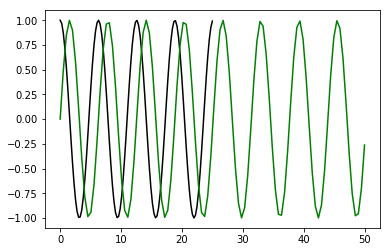

In [14]:
# plotting a line

# x = np.random.normal(size=1000)
x_data = np.linspace(0, 25, 100)
y_data = np.linspace(0, 50, 100)
plt.plot(x_data, np.cos(x_data), color = "black");
plt.plot(y_data, np.sin(y_data), color = "green");

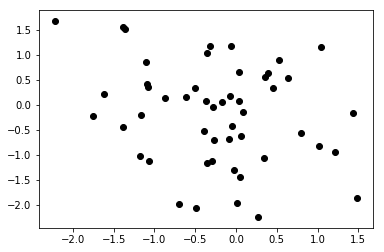

In [15]:
# plt.scatter(x,y,color = "some_color") ~ Display Scatter Plot With Points

x_data = np.random.normal(size=50)
y_data = np.random.normal(size=50)
plt.scatter(x_data, y_data, color = 'k');

In [16]:
# Display Images
# .shape ~ Prints shape of array
x_points = np.linspace(1, 50, 250)
y_points = x_points[:, np.newaxis]

im = y_points * np.sin(x_points) * np.cos(y_points)
print(im.shape)

(250, 250)


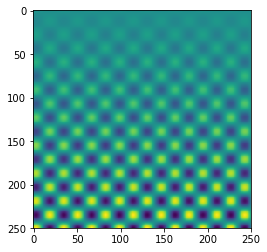

In [17]:
# plt.imshow ~ Displays Images In A Graph
plt.imshow(im);

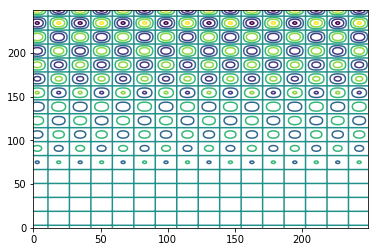

In [18]:
# plt.contour(im) ~ Create Contour Plot. Used For Representing 3-Dimensional Plot 
plt.contour(im)